<a href="https://colab.research.google.com/github/icarocarmona/pos-tech-dtat/blob/main/desafios/Desafio_Analise_base_de_carros_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
!pip install word2number


In [42]:
from word2number import w2n


In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/icarocarmona/pos-tech-dtat/main/data/CarsPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [45]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [47]:
df.shape

(205, 26)

In [48]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [49]:
cars = df.drop('CarName', axis=1)

processing

In [50]:
cars['doornumber'] = cars['doornumber'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)
cars['cylindernumber'] = cars['cylindernumber'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)



In [51]:
from sklearn.preprocessing import LabelEncoder

cars['fueltype'] = LabelEncoder().fit_transform(cars['fueltype'])
cars['aspiration'] = LabelEncoder().fit_transform(cars['aspiration'])
cars['carbody'] = LabelEncoder().fit_transform(cars['carbody'])
cars['drivewheel'] = LabelEncoder().fit_transform(cars['drivewheel'])
cars['enginelocation'] = LabelEncoder().fit_transform(cars['enginelocation'])
cars['fuelsystem'] = LabelEncoder().fit_transform(cars['fuelsystem'])
cars['enginetype'] = LabelEncoder().fit_transform(cars['enginetype'])



In [52]:
cars.head(3)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,2,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0


In [53]:
correlacao_matrix = cars.corr().round(2)

<Axes: >

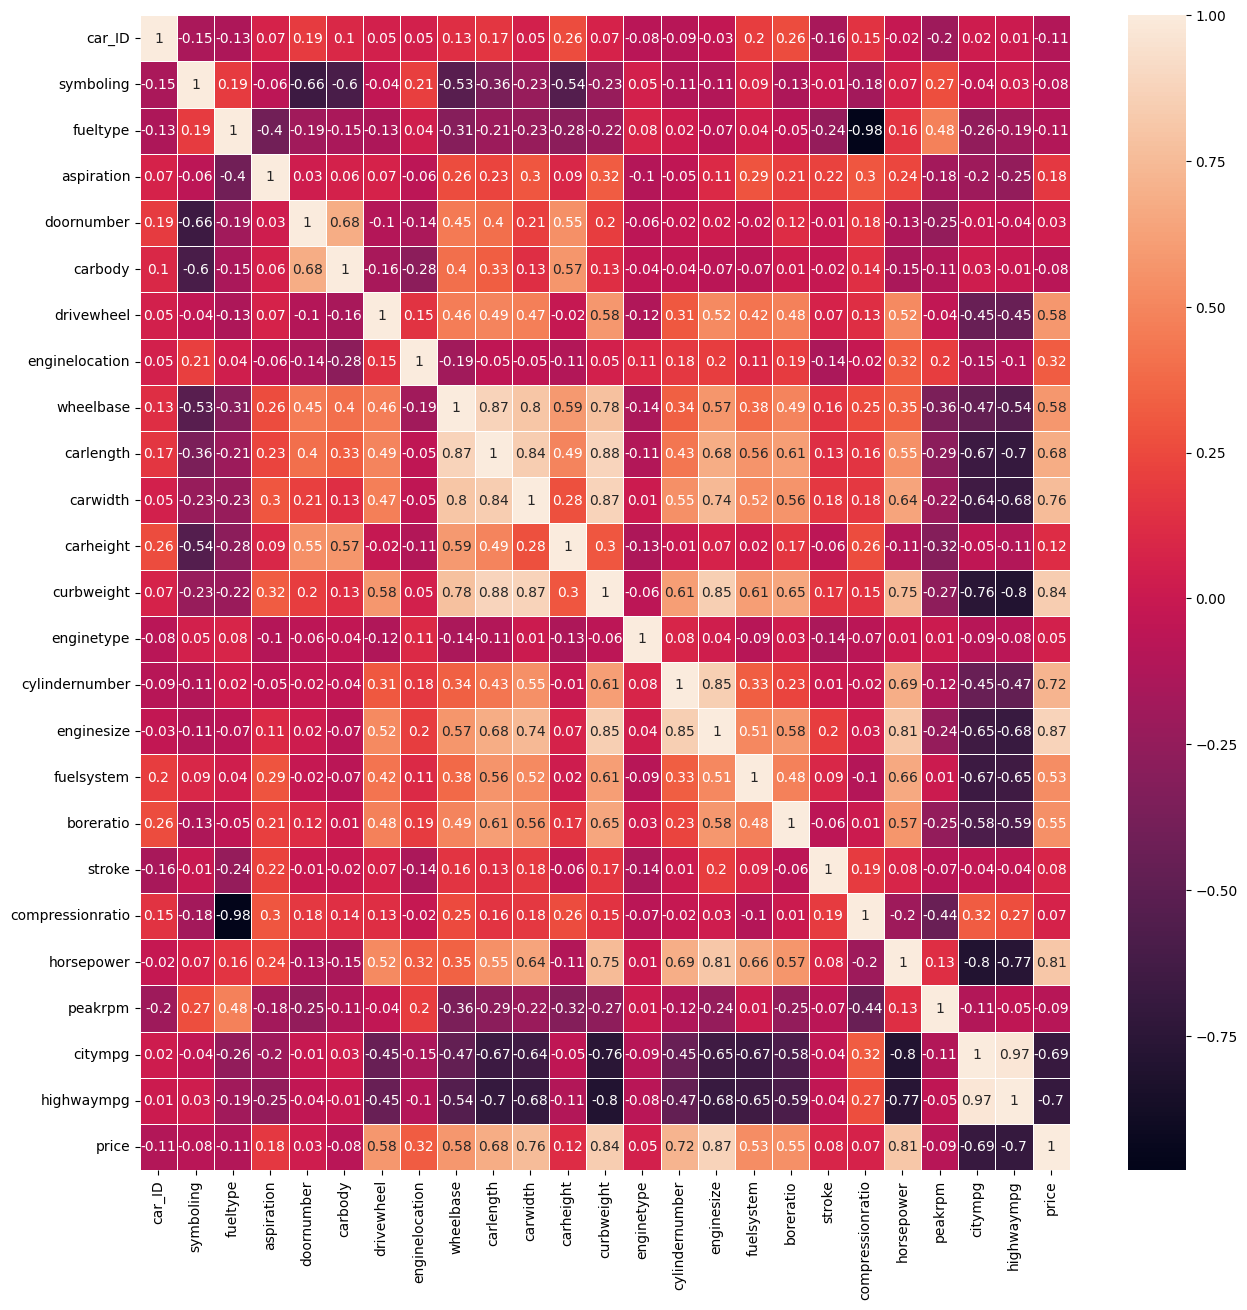

In [55]:
fig, aux = plt.subplots(figsize=(15,15))
sns.heatmap(data=correlacao_matrix, annot=True, linewidths=0.5, ax=aux)

In [58]:
cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<Axes: >

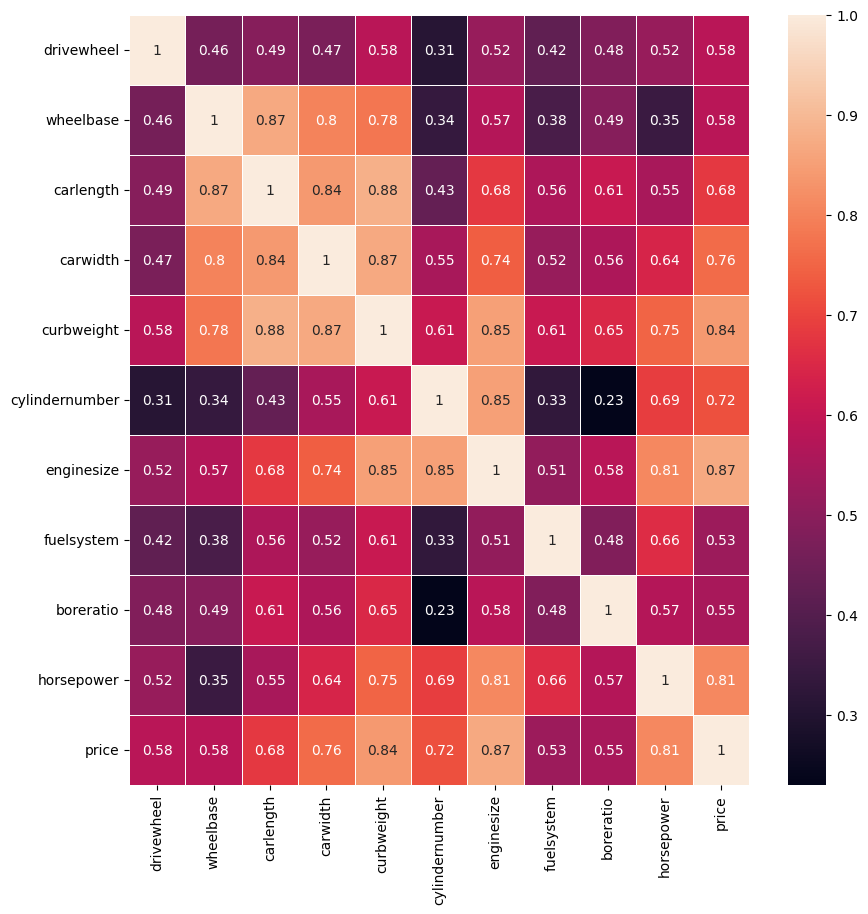

In [61]:
cars2 = cars[[ 'drivewheel','wheelbase','carlength','carwidth','curbweight','cylindernumber','enginesize','fuelsystem','boreratio','horsepower', 'price']]

correlacao_matrix = cars2.corr().round(2)
fig, aux = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlacao_matrix, annot=True, linewidths=0.5, ax=aux)

Text(0.5, 1.0, 'Histograma da variável valor')

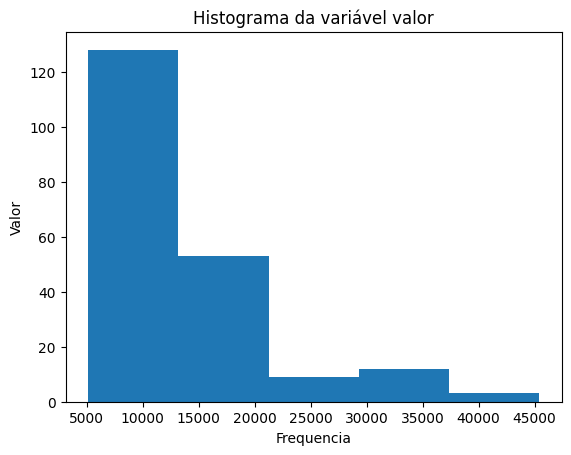

In [63]:
plt.hist(cars2["price"],bins=5)
plt.xlabel("Frequencia")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

In [64]:
cars2["raiz_price"] = np.sqrt(cars2['price'])

<ipython-input-64-9fe540a02357>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2["raiz_price"] = np.sqrt(cars2['price'])


Text(0.5, 1.0, 'Histograma da variável valor')

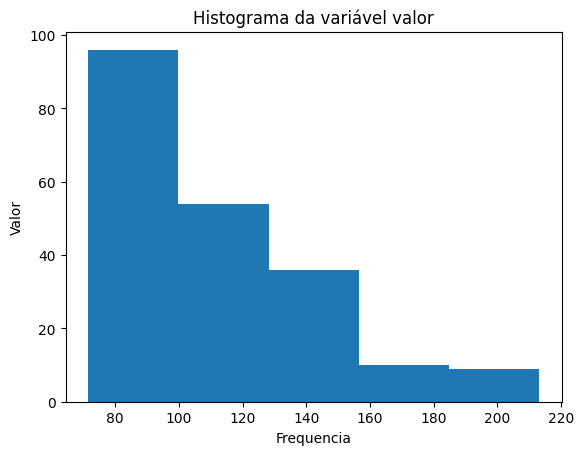

In [65]:
plt.hist(cars2["raiz_price"],bins=5)
plt.xlabel("Frequencia")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

In [66]:
cars2.head()

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,raiz_price
0,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,13495.0,116.167982
1,2,88.6,168.8,64.1,2548,4,130,5,3.47,111,16500.0,128.452326
2,2,94.5,171.2,65.5,2823,6,152,5,2.68,154,16500.0,128.452326
3,1,99.8,176.6,66.2,2337,4,109,5,3.19,102,13950.0,118.110118
4,0,99.4,176.6,66.4,2824,5,136,5,3.19,115,17450.0,132.098448


Text(0, 0.5, 'largura do carro')

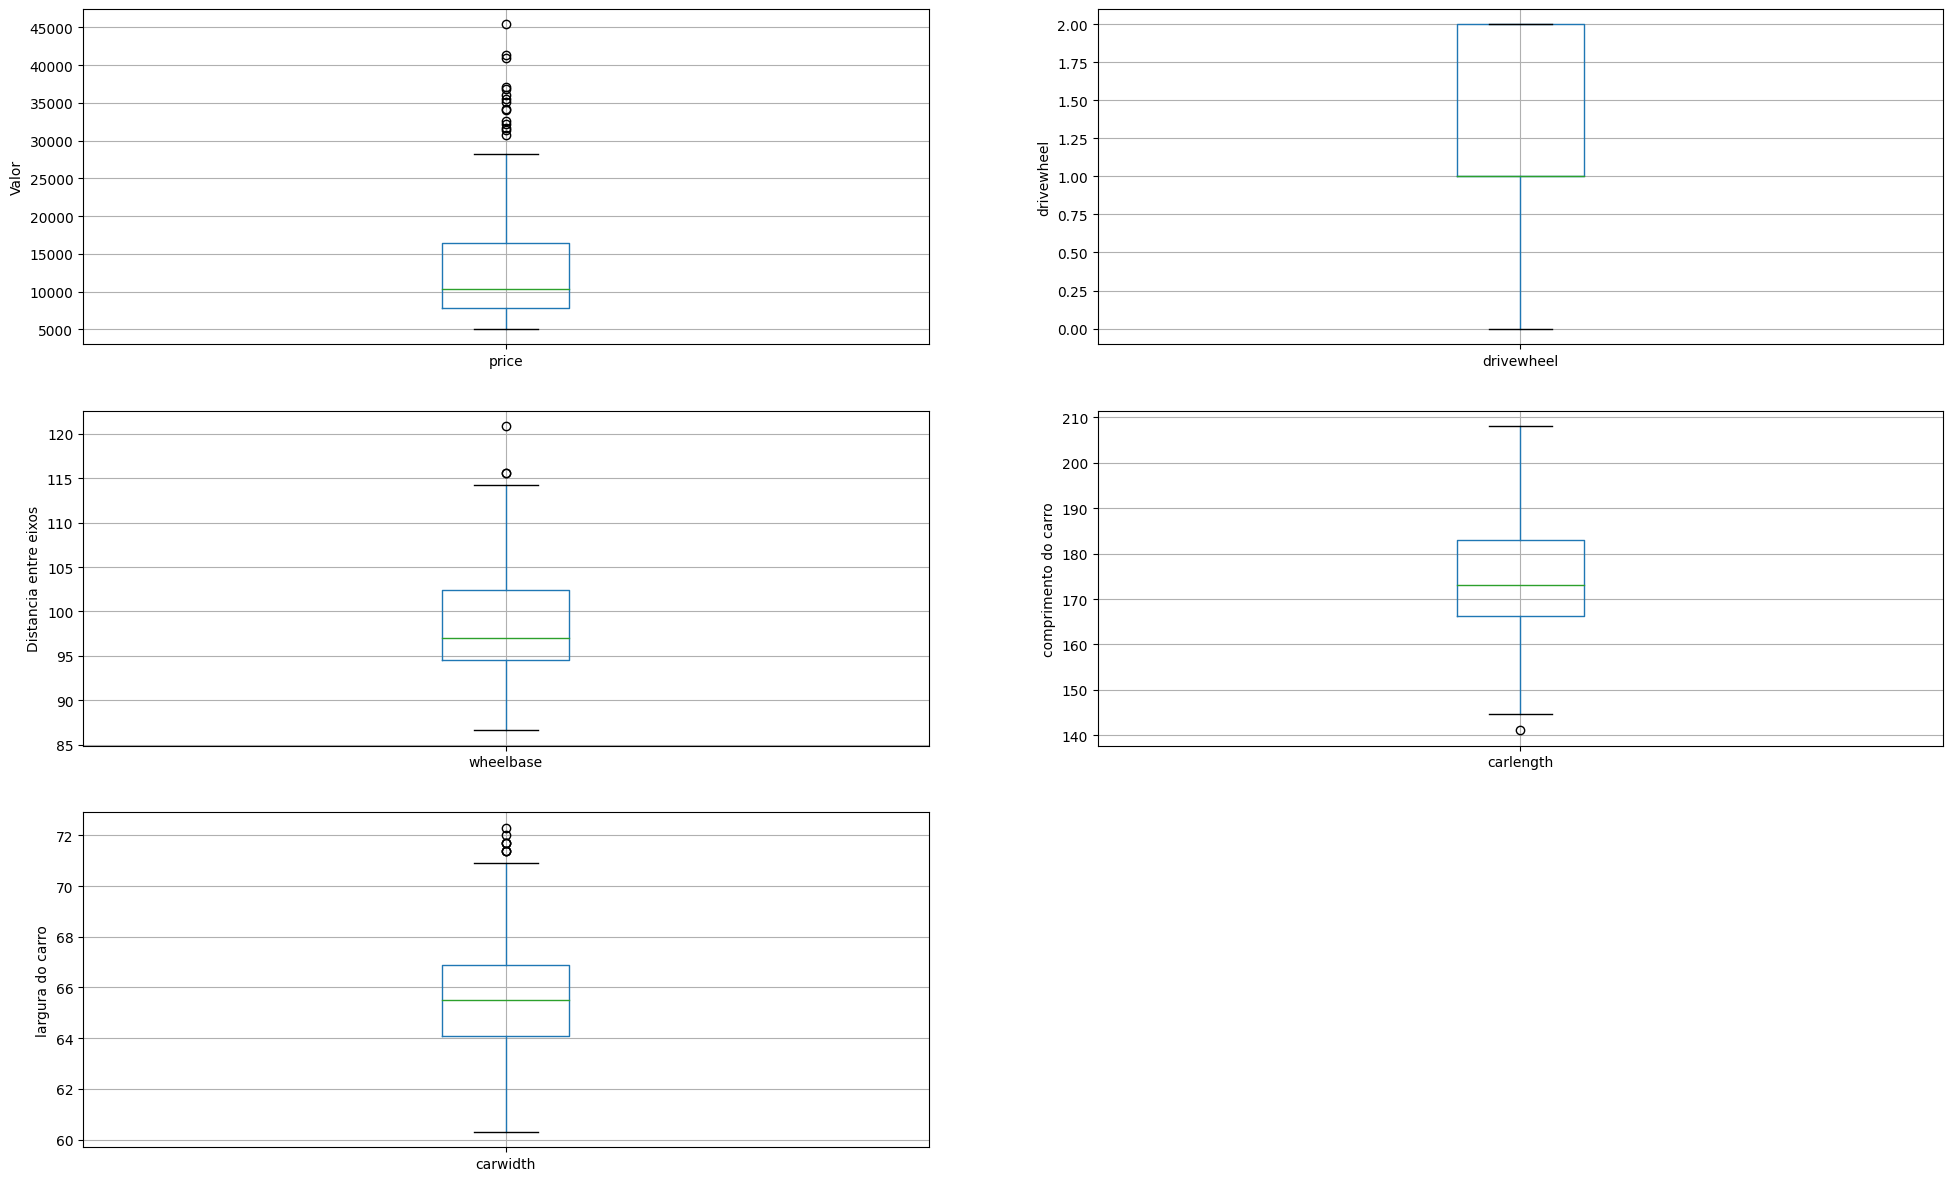

In [70]:
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = cars2.boxplot(column = "price")
fig.set_title("")
fig.set_ylabel("Valor")

plt.subplot(4,2,2)
fig = cars2.boxplot(column = "drivewheel")
fig.set_title("")
fig.set_ylabel("drivewheel")

plt.subplot(4,2,3)
fig = cars2.boxplot(column = "wheelbase")
fig.set_title("")
fig.set_ylabel("Distancia entre eixos")

plt.subplot(4,2,4)
fig = cars2.boxplot(column = "carlength")
fig.set_title("")
fig.set_ylabel("comprimento do carro")

plt.subplot(4,2,5)
fig = cars2.boxplot(column = "carwidth")
fig.set_title("")
fig.set_ylabel("largura do carro")

Text(0, 0.5, 'cavalos de potencia')

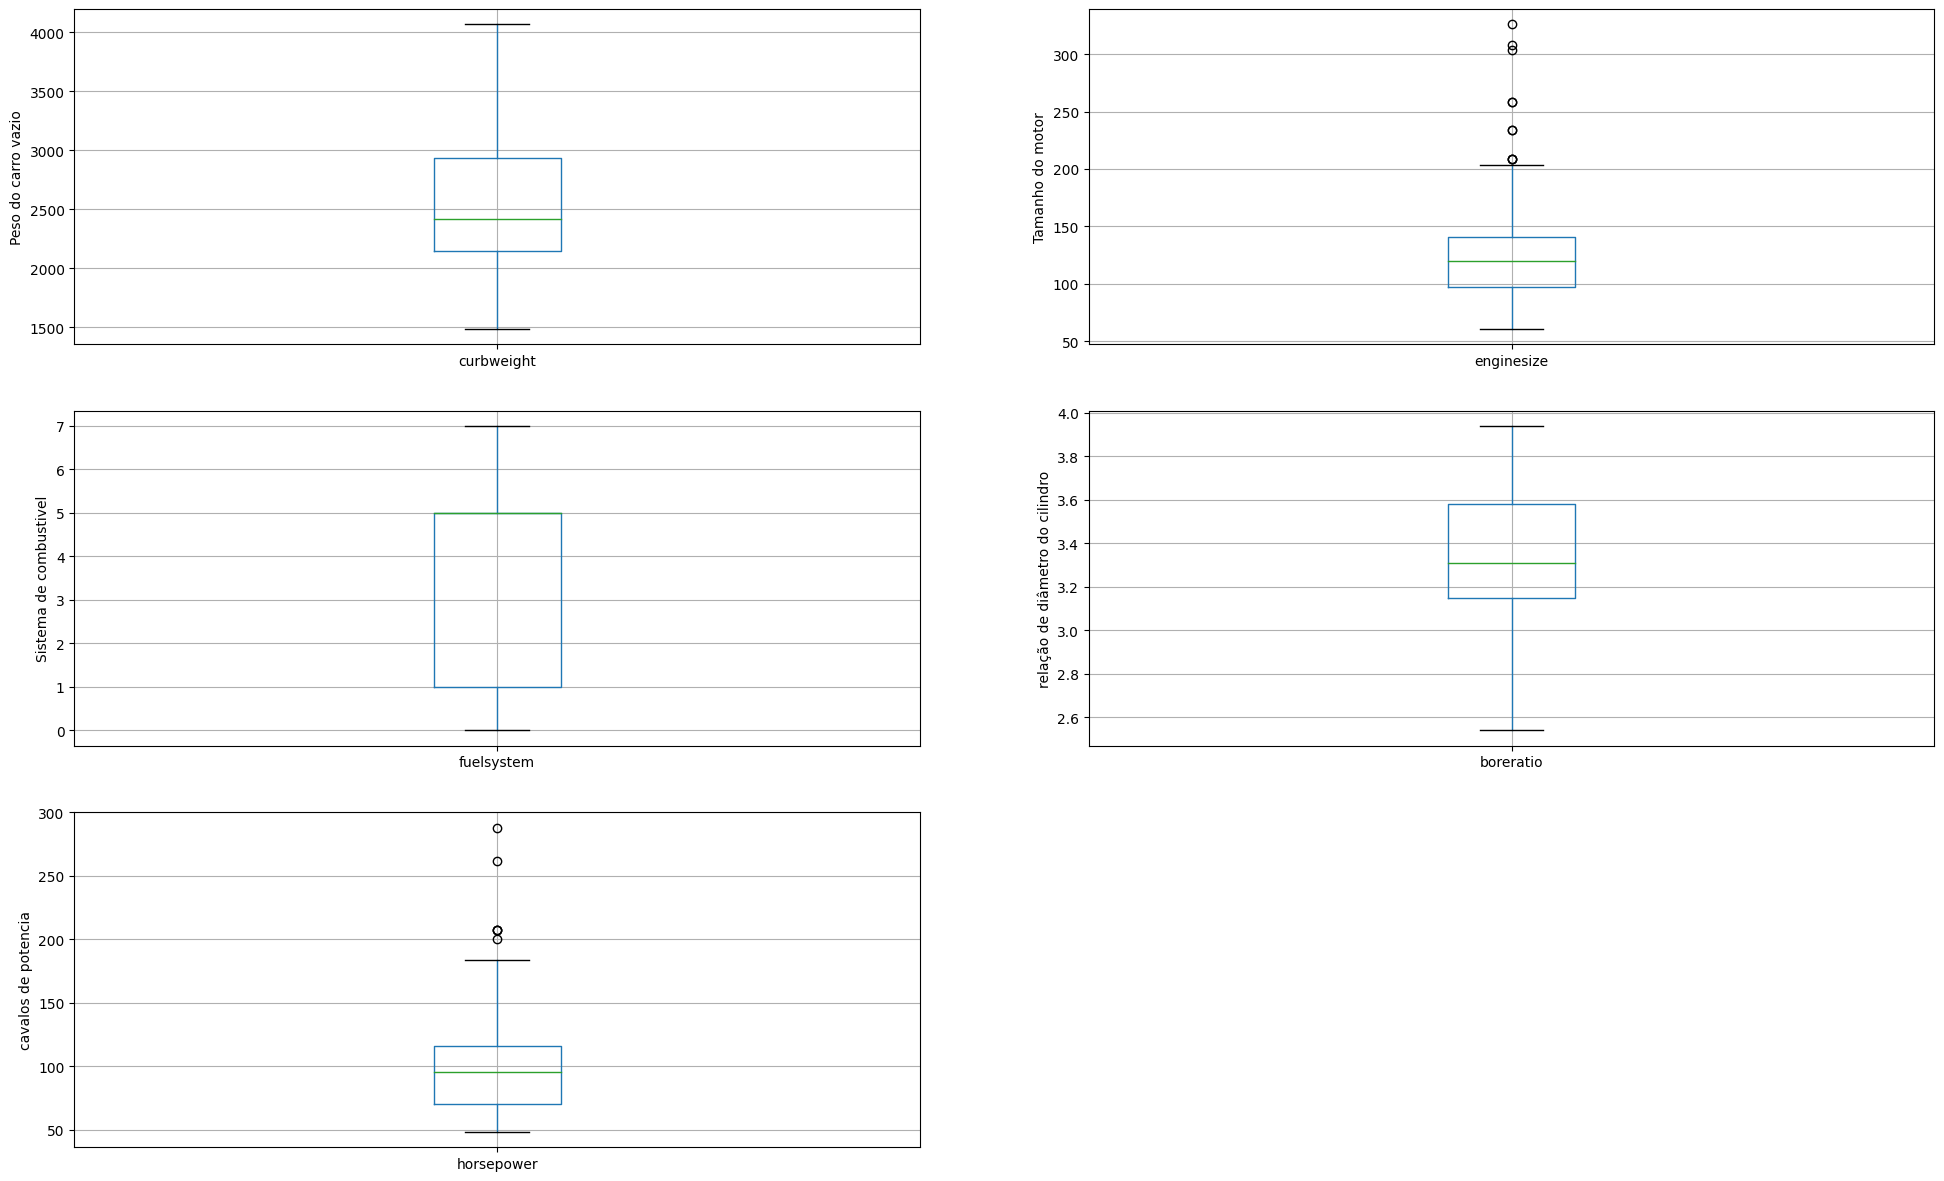

In [73]:
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = cars2.boxplot(column = "curbweight")
fig.set_title("")
fig.set_ylabel("Peso do carro vazio")

plt.subplot(4,2,2)
fig = cars2.boxplot(column = "enginesize")
fig.set_title("")
fig.set_ylabel("Tamanho do motor")

plt.subplot(4,2,3)
fig = cars2.boxplot(column = "fuelsystem")
fig.set_title("")
fig.set_ylabel("Sistema de combustivel")

plt.subplot(4,2,4)
fig = cars2.boxplot(column = "boreratio")
fig.set_title("")
fig.set_ylabel("relação de diâmetro do cilindro")

plt.subplot(4,2,5)
fig = cars2.boxplot(column = "horsepower")
fig.set_title("")
fig.set_ylabel("cavalos de potencia")


Text(0.5, 1.0, 'ano do carro x valor')

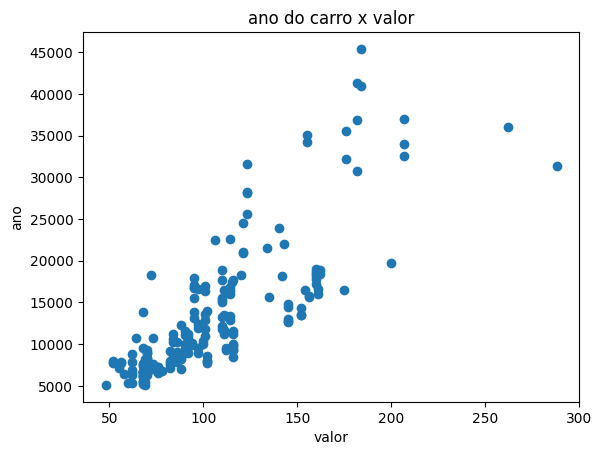

In [75]:
plt.scatter( "horsepower","price", data=cars)
plt.xlabel("valor")
plt.ylabel("ano")
plt.title("ano do carro x valor")

<Axes: xlabel='drivewheel', ylabel='price'>

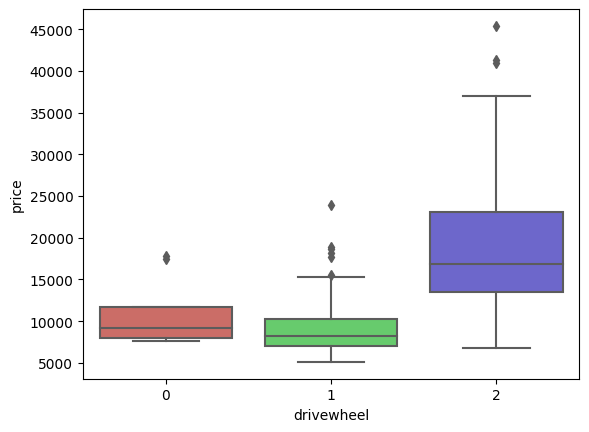

In [76]:
sns.boxplot(data=cars, x="drivewheel", y="price", palette="hls")

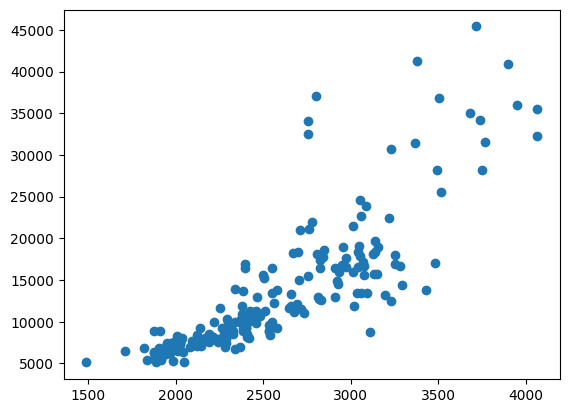

In [80]:
plt.scatter(data=cars, x="curbweight", y="price")

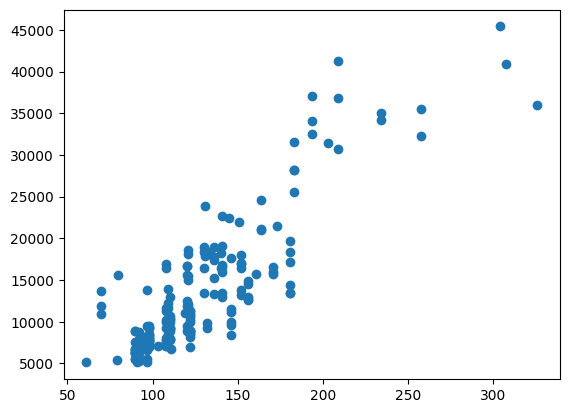

In [82]:
plt.scatter(data=cars, x="enginesize", y="price")

<Axes: xlabel='drivewheel', ylabel='price'>

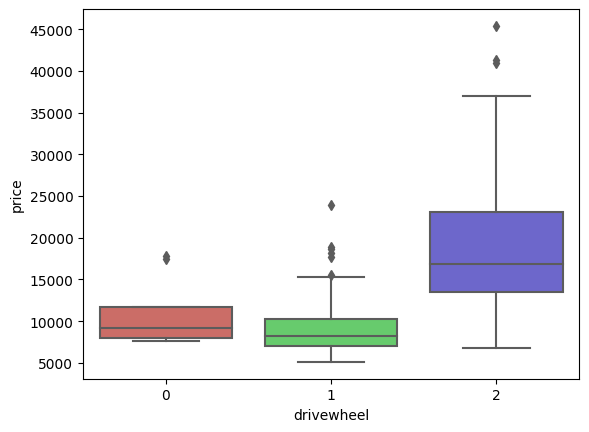

In [84]:
sns.boxplot(data=cars, x="drivewheel", y="price", palette="hls")

In [85]:
# regressão linear múltipla
from sklearn.linear_model import LinearRegression

# criando um obj de regressão linear
lr = LinearRegression()

In [86]:
#X contem as variáveis preditoras ou independentes
X = cars[cars.columns].drop('price', axis=1)

# y variáveis target ou dependente
y = cars[['price']]


In [87]:
from sklearn.model_selection import train_test_split

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 101)

In [88]:
#treinando o modelo
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
# Calculando o valor predito da variável resposta na amostra de teste
y_pred = lr.predict(X_test)

In [90]:
print('Intercepto:', lr.intercept_)

Intercepto: [-76692.12435155]


In [91]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefficients

,0,0
0,car_ID,-18.787410
1,symboling,9.996126
2,fueltype,2616.117868
3,aspiration,718.657978
4,doornumber,319.223616
5,carbody,-1076.452796
6,drivewheel,1502.450492
7,enginelocation,10228.424019
8,wheelbase,41.548758
9,carlength,10.318127


In [92]:
def plt_regplot(y_test, y_pred):
  fig = plt.figure(figsize=(8,6), dpi=80)
  plt.rcParams.update({'font.size':14})
  ax = sns.regplot(x = y_test, y = y_pred)
  ax.set(xlabel='y real', ylabel='y predito')
  ax = plt.plot(y_test,y_test, '--r')

  plt.show()

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [94]:
def avaliando_modelo(ytest, ypred):
  plt_regplot(ytest, ypred)
  # avaliando o modelo
  MAE = mean_absolute_error(ytest, ypred)
  MSE = mean_squared_error(ytest, ypred)
  r2 = r2_score(ytest, ypred)

  print('MAE', MAE) # é a média do valor absoluto dos erros
  print('MSE', MSE) # é a média dos erros quadráticos
  print('r²', r2) # R-quadrado

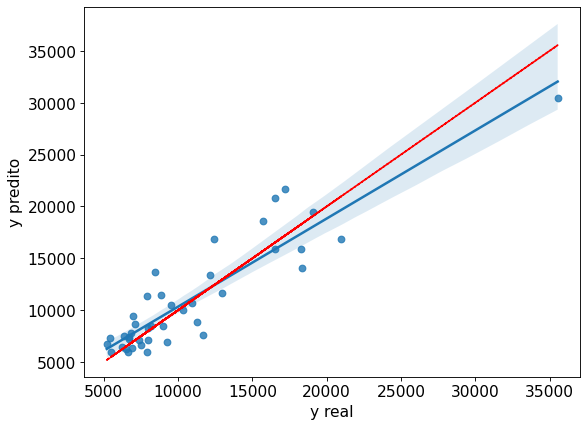

MAE 1826.289086312201
MSE 5747747.70142569
r² 0.8284478737483583


In [95]:
avaliando_modelo(y_test, y_pred)

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
#criando o modelo
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [98]:
y_pred_mode_dtr = model_dtr.predict(X_test)

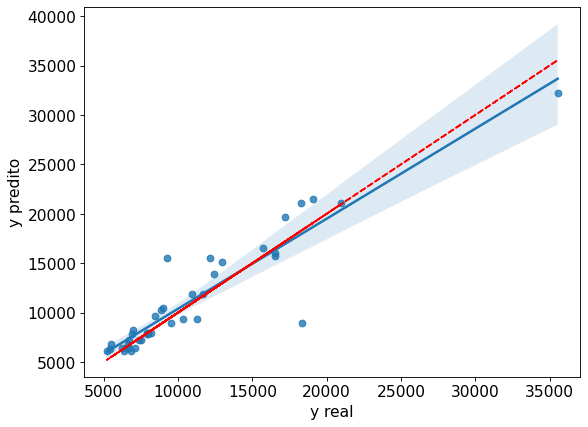

MAE 1318.4430894308944
MSE 4831573.058943089
r² 0.8557927949418794


In [99]:
avaliando_modelo(y_test,y_pred_mode_dtr)

In [100]:
from sklearn.svm import SVR

In [101]:
svr = SVR(kernel= 'linear')

In [102]:
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [104]:
y_pred_svr = svr.predict(X_test)

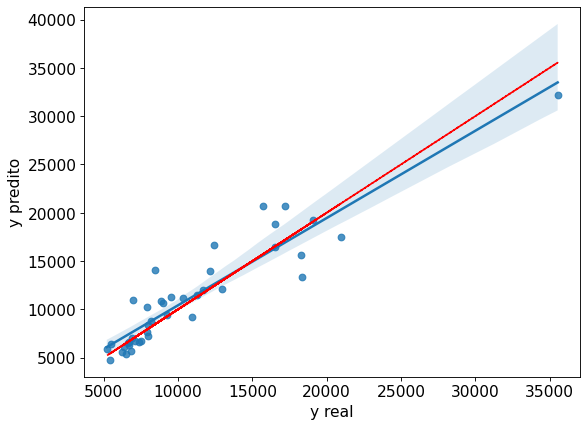

MAE 1545.0401994293375
MSE 4756379.159795342
r² 0.8580370954835939


In [105]:
avaliando_modelo(y_test, y_pred_svr)